In [1]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Dataset to fit

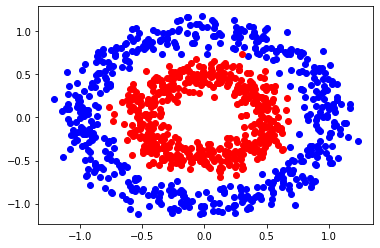

In [2]:
samples = 1000
x, y = make_circles(samples, noise=0.1, factor=.5)
plt.plot(x[y == 0,0], x[y == 0,1], 'bo')
plt.plot(x[y == 1,0], x[y == 1,1], 'ro')
plt.show()

In [3]:
y = y.reshape(-1, 1)
m, f = x.shape
print(f'Features: {f}, Samples: {m}')

Features: 2, Samples: 1000


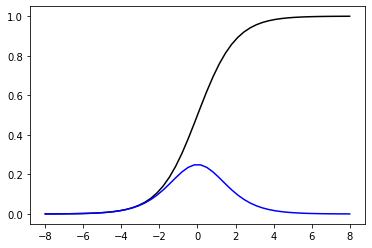

In [4]:
# Activation function
def act(z):
    return 1/(1+np.exp(-z))
def d_act(z):
    return act(z)*(1-act(z))

t = np.linspace(-8,8)
plt.plot(t, act(t), '-k')
plt.plot(t, d_act(t), '-b')
plt.show()

In [5]:
# Cost function
def cost(a, y):
    m = len(a)
    return - (y * np.log(a) + (1-y) * np.log(1-a)).sum()/m
def d_cost(a, y):
    return (a-y)/(a*(1-a))

In [6]:
config = [2,4,3,1]

In [7]:
W = []
for i in range(len(config) - 1):
    inputs = config[i]
    outputs = config[i+1]

    # Add here bias term
    w = np.random.rand(inputs + 1, outputs)
    W.append(w)

[w.shape for w in W]

[(3, 4), (5, 3), (4, 1)]

## Forward

In [8]:
def __forward(f):
    m, n = f.shape
    A = [f]
    Z = []
    for w in W:
        n, _ = w.shape
        x0 = np.ones([m, n])
        x0[:, 1:] = A[-1]

        z = (x0 @ w)
        a = act(z)
        Z.append(z)
        A.append(a)

    return Z, A

def forward(f):
    Z, A = __forward(f)
    return A[-1]
pred = forward(x)

print(f'this should be {m, config[-1]} and got {pred.shape}')

this should be (1000, 1) and got (1000, 1)


## Back propagation

In [9]:
def backprop(x, y, lr=1):
  Z, A = __forward(x)

  e = cost(A[-1], y)

  d = d_cost(A[-1], y) * d_act(Z[-1])
  deltas = [None] * len(W)
  
  deltas[-1] = np.zeros(W[-1].shape)
  deltas[-1][0] = d.sum(axis=0) / m
  deltas[-1][1:] = (d.T @ A[-2]).T / m

  for i in range(2, len(W) + 1):
    z = Z[-i]
    w = W[-i+1]
    d = d @ w[1:].T * d_act(Z[-i])

    deltas[-i] = np.zeros(W[-i].shape)
    deltas[-i][0] = d.sum(axis=0) / m
    deltas[-i][1:] = (A[-i-1].T @ d) / m
  
  for i in range(len(W)):
    W[i] -= lr * deltas[i]
  
  return e

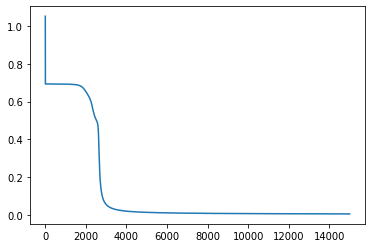

In [10]:
iterations = 15000
lr = 1
errors = np.array([backprop(x, y, lr) for i in range(iterations)])
plt.plot(range(iterations), errors)
plt.show()

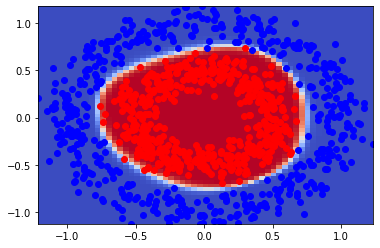

In [11]:
xx, yy = np.meshgrid(
    np.linspace(x[:,0].min(), x[:,0].max(), 60),
    np.linspace(x[:,1].min(), x[:,1].max(), 60),
)

# for each rrow in the mesh plane
prediction = np.zeros(xx.shape)
for i, (m_x, m_y) in enumerate(zip(xx, yy)):
    f = np.array([m_x, m_y]).T
    a = forward(f)
    prediction[i,:] = a.ravel()

plt.plot(x[y[:,0] == 0,0], x[y[:,0] == 0,1], 'bo')
plt.plot(x[y[:,0] == 1,0], x[y[:,0] == 1,1], 'ro')
plt.pcolormesh(xx, yy, prediction, cmap='coolwarm')
plt.show()

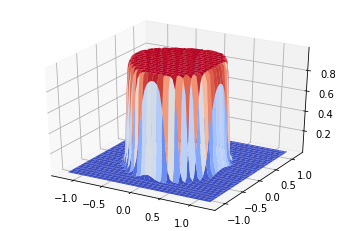

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xx, yy, prediction, cmap='coolwarm', linewidth=0, antialiased=True)
plt.show()